[15.05546601 23.33341089 24.49055572 32.82112698  9.17538101 28.35411342
 16.27159503 24.41464788 19.96278166 20.30871849 19.33720147 24.27891872
 27.97113648 22.50422583 16.91796743 23.74218226 14.20411468 18.17779696
 30.46755836 32.91463083 32.58124074 19.56348185 18.62984519 19.0361473
 23.87754377 20.9972879  17.47624276 25.15479735 23.25467926 14.44308274
 20.82192971 18.85669457 18.84305527 20.56052279 35.32972437 32.394027
 31.24736115 37.07012522 30.49487337  4.93880256 17.15034552 17.07265809
 14.3294022  16.45446869 35.3994162  29.27889777 11.73804702  7.44871684
 32.69506874 21.82678415 17.94117068 24.65947569 30.60179059 17.3073091
 11.38347227 12.59860367 25.56385639 10.34220464 22.5824459  22.7428837
 24.99008197 38.1722005  20.11922316 17.42792345 22.1767473  25.38509095
 25.14096457 22.69224033 20.71016963 13.45453185 18.94135646 30.73624923
 27.96417425 25.23660676 20.60953552 30.202195   23.4210497  21.74549395
 21.2102679  29.98578499 25.73115226  9.20336158 15.7590

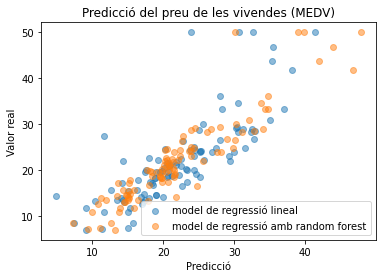

In [46]:
#Exercici 1

#Importem les llibreries necessàries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
#Llegim el conjunt de dades i el guardem en un dataframe

# carreguem el dataset
col_names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
dataset = pd.read_csv("housing data.csv", names=col_names)

# separam el dataset en conjunts de train i test
X = dataset.drop("MEDV", axis=1)  # seleccionam totes les columnes excepte MEDV com a variables independents
y = dataset["MEDV"]  # seleccionam MEDV com a variable dependent

#Dividim el conjunt de dades en dos subconjunts: entrenament i test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# crear els models
reg = LinearRegression()
rfr = RandomForestRegressor()

# entrenar els models amb el conjunt de dades de train
reg.fit(X_train, y_train)
rfr.fit(X_train, y_train)
# fer prediccions amb els models utilitzant el conjunt de dades de test
y_pred_reg = reg.predict(X_test)
y_pred_rfr = rfr.predict(X_test)

print(y_pred_reg,y_pred_rfr)
#Evaluem la precisió dels models de regressió amb el conjunt de test


# gràfic de dispersió amb els valors reals de y_test en l'eix Y i les prediccions de cada model en l'eix X
plt.scatter(y_pred_reg, y_test, alpha=0.5, label="model de regressió lineal")
plt.scatter(y_pred_rfr, y_test, alpha=0.5, label="model de regressió amb random forest")
plt.title("Predicció del preu de les vivendes (MEDV)")
plt.xlabel("Predicció")
plt.ylabel("Valor real")
plt.legend()
plt.show()


In [47]:
#Exercici 2

# importar les funcions mean_squared_error i r2_score
from sklearn.metrics import mean_squared_error, r2_score

# calcular el MSE i el R2 per a cada model
mse_reg = mean_squared_error(y_test, y_pred_reg)
r2_reg = r2_score(y_test, y_pred_reg)

mse_rfr = mean_squared_error(y_test, y_pred_rfr)
r2_rfr = r2_score(y_test, y_pred_rfr)

# imprimir els resultats
print("MSE model de regressió lineal:", mse_reg)
print("R2 model de regressió lineal:", r2_reg)

print("MSE model de regressió amb random forest:", mse_rfr)
print("R2 model de regressió amb random forest:", r2_rfr)

MSE model de regressió lineal: 31.101873500692392
R2 model de regressió lineal: 0.6405366993127615
MSE model de regressió amb random forest: 13.023922382352941
R2 model de regressió amb random forest: 0.8494745942764261


In [48]:
#Exercici 3 i 4

# importar les funcions train_test_split i StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# dividir el conjunt de dades en train i test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# estandarditzar les variables d'entrada
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_scaled = scaler.fit_transform(X)

# importar les funcions LinearRegression i RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# crear els models amb diferents paràmetres
reg = LinearRegression(fit_intercept=False)
rfr = RandomForestRegressor(n_estimators=100, max_depth=5)

# entrenar el model de regressió lineal amb les variables d'entrada estandarditzades
reg.fit(X_train_scaled, y_train)

# fer prediccions amb el model entrenat
y_pred_reg = reg.predict(X_test_scaled)

# calcular el MSE i el R2 per al model de regressió lineal
mse_reg = mean_squared_error(y_test, y_pred_reg)
r2_reg = r2_score(y_test, y_pred_reg)

# imprimir els resultats
print("MSE model de regressió lineal:", mse_reg)
print("R2 model de regressió lineal:", r2_reg)

# importar la funció cross_val_score
from sklearn.model_selection import cross_val_score

# obtenir diferents puntuacions de validació cruïlla per al model de regressió lineal estandarditzat
scores_reg = cross_val_score(reg, X_scaled, y, cv=5)

# imprimir les puntuacions
print("Puntuacions de validació cruïlla model de regressió lineal:", scores_reg)

#Sobre el MSE: Tenim un valor del MSE bastant gran, cosa que vol dir que no és molt precís
#Sobre el R2: No explica gaire la variabilitat dels valors observats.
#Sobre els scores de validació cruïlla: indiquen que el model està fent prediccions molt pobres.

MSE model de regressió lineal: 554.7251512946468
R2 model de regressió lineal: -6.564387481304515
Puntuacions de validació cruïlla model de regressió lineal: [ -24.85873967  -28.21586566  -15.1909724   -11.46223741 -175.02494407]


In [49]:
#MILLOREM ELS RESULTATS DE LA REGRESSIÓ LINEAL

from sklearn.model_selection import GridSearchCV

# definir els paràmetres a optimitzar i els possibles valors
param_grid = {'fit_intercept': [True, False]}

# crear una instància de GridSearchCV
reg = LinearRegression()
grid_search = GridSearchCV(reg, param_grid, cv=5)

# entrenar el model amb els diferents paràmetres
grid_search.fit(X_train, y_train)

# obtenir el millor model
best_model = grid_search.best_estimator_

# fer prediccions amb el millor model
y_pred = best_model.predict(X_test)

# calcular el MSE i el R2
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# imprimir els resultats
print("MSE millor model:", mse)
print("R2 millor model:", r2)

# importar la funció cross_val_score
from sklearn.model_selection import cross_val_score

# obtenir diferents puntuacions de validació cruïlla per al millor model de regressió lineal
scores = cross_val_score(best_model, X, y, cv=5)

# imprimir les puntuacions
print("Puntuacions de validació cruïlla millor model:", scores)

#Es pot veure que el MSE i el R2 han millorat respecte als resultats obtinguts en la primera execució del model 
#de regressió lineal. Això indica que amb els paràmetres optimitzats s'ha obtingut un model de regressió lineal 
#que funciona millor que amb els paràmetres per defecte.
#Les puntuacions de validació cruïlla també han millorat, ja que s'han obtingut valors més propers a 1. 
#Això indica que el model generalitza bé a dades noves, ja que les puntuacions de validació cruïlla es fan servir 
#per evaluar el rendiment del model amb dades que no s'han utilitzat per entrenar-lo.

MSE millor model: 24.291119474973467
R2 millor model: 0.6687594935356327
Puntuacions de validació cruïlla millor model: [ 0.63919994  0.71386698  0.58702344  0.07923081 -0.25294154]


In [55]:
#Exercici 5

X_train_no_rm = X_train.drop(columns=["RM"])
X_test_no_rm = X_test.drop(columns=["RM"])

best_model.fit(X_train_no_rm, y_train)
y_pred = best_model.predict(X_test_no_rm)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE millor model sense RM:", mse)
print("R2 millor model sense RM:", r2)
scores = cross_val_score(best_model, X.drop(columns=["RM"]), y, cv=5)


print("Puntuacions de validació cruïlla millor model sense RM:", scores)

#Veiem que ha millorat una mica
#També podriem millorar els resultat utilizant per exemple el random forest i/o executant múltiples iteracions del Exercici1

MSE millor model sense RM: 22.133246888189817
R2 millor model sense RM: 0.6981848483146994
Puntuacions de validació cruïlla millor model sense RM: [0.46450601 0.61522064 0.43616681 0.57879898 0.37296639]
